<table style="border:none">
<!-- <tr style="border:none">
<td colspan=2 style="border:none">
<img src="images/gear.png" alt="gear logo" />
</td>
</tr> -->
<tr style="border:none">
<td colspan=2 style="border:none">
<h1>A Brief Introduction to the RDKit (2016 edition)</h1>
</td>
</tr>
<tr style="border:none">
<td style="border:none">
Greg Landrum, Ph.D.<br />
T5 Informatics, KNIME.com <br />
Basel, Switzerland<br />
<img style="align:left" align="left" src="images/T5.shaded.132.png" alt="T5 logo" />
</td>
<td style="border:none">
<img src="images/logo.lrg.png" alt="RDKit logo" />
</td>
</tr></table>

**Note:** this notebook was not actually presented at the RDKit UGM, but I did present it a few times at more-or-less contemporaneous events and it certainly could have been a session at the UGM if we didn't already have a bunch of great speakers, so I'm including it here.

In [1]:
from IPython.display import Image


# Start with some basics


This presentation will use the Jupyter notebook, so we import the RDKit Jupyter integration as well as the standard RDKit Python code.

**Note** this document uses features that will first appear in the `2016.09` RDKit release, so if you are using an older version, some of this may not work for you.

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem    # <- a convenience thing
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

### Working with SMILES:

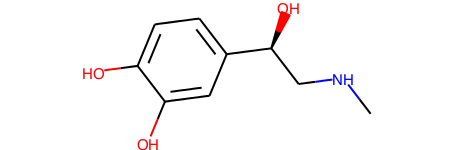

In [3]:
mol = Chem.MolFromSmiles('Oc1ccc(cc1O)[C@@H](O)CNC')
mol

The molecule was rendered using the RDKit's Jupyter integration. If you were working from the python prompt you'd see something more like this:
```
>>> mol = Chem.MolFromSmiles('Oc1ccc(cc1O)[C@@H](O)CNC')
>>> mol
<rdkit.Chem.rdchem.Mol object at 0x104833580>
```

### Working with other formats

In [4]:
epi_molblock = """epinephrine
  Mrv1642510171608202D          

 13 13  0  0  1  0            999 V2000
    0.7145    2.0625    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    1.2375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145   -0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7145    1.2375    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145   -1.2375    0.0000 C   0  0  1  0  0  0  0  0  0  0  0  0
   -0.0000   -1.6500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -1.6500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -2.4750    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.1434   -2.8875    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  4  0  0  0  0
  3  4  4  0  0  0  0
  4  5  4  0  0  0  0
  5  6  4  0  0  0  0
  6  7  4  0  0  0  0
  2  7  4  0  0  0  0
  7  8  1  0  0  0  0
  5  9  1  0  0  0  0
  9 10  1  6  0  0  0
  9 11  1  0  0  0  0
 11 12  1  0  0  0  0
 12 13  1  0  0  0  0
M  END
"""

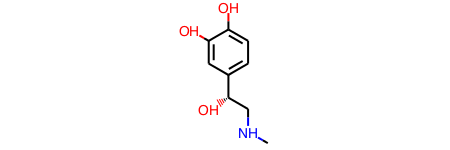

In [5]:
mol_mb = Chem.MolFromMolBlock(epi_molblock)
mol_mb

Notice the diffferent orientation since the coordinates now come from the CTAB instead of being calculated by the RDKit.

Note that if the Mol block information is in a file, we can use `Chem.MolFromMolFile(filename)`

## Hydrogens and what becomes of them

For most standard cheminformatics operations on organic molecules, having hydrogens explicitly present in the molecular graph is not necessary. In order to save time and memory, the RDKit removes Hs by default when reading in molecules:

In [6]:
mb="""ethane
     RDKit          2D

  8  7  0  0  0  0  0  0  0  0999 V2000
   -0.7496   -0.0246    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7496    0.0246    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5417    1.2492    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1416   -0.5835    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4409   -1.4924    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5417   -1.2492    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.1416    0.5835    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4409    1.4924    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  1  4  1  0
  1  5  1  0
  2  6  1  0
  2  7  1  0
  2  8  1  0
M  END
"""
m = Chem.MolFromMolBlock(mb)
m.GetNumAtoms()

2

The Hs are still implicitly there:

In [7]:
m.GetAtomWithIdx(0).GetNumImplicitHs()

3

If we need to keep the Hs from the input file, we can do so;

In [8]:
m = Chem.MolFromMolBlock(mb,removeHs=False)
m.GetNumAtoms()

8

In [9]:
m.GetAtomWithIdx(0).GetNumImplicitHs()

0

## The RDKit and chemical correctness

An important point to understand from the outset is that the RDKit is, by default, very strict about what it accepts as an input molecule. Things that can cause failure are atoms with unreasonable valence states or aromatic rings that cannot be converted to Kekule form.

Here's a simple example:

In [10]:
mol_bad = Chem.MolFromSmiles('CCO(CC)CC')
mol_bad is None

RDKit ERROR: [08:52:15] Explicit valence for atom # 2 O, 3, is greater than permitted


True

Turn off sanitization so that we can look at the molecule and see what it's complaining about:

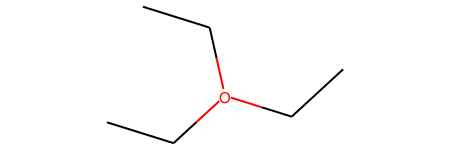

In [11]:
mol_bad = Chem.MolFromSmiles('CCO(CC)CC',sanitize=False)
mol_bad.UpdatePropertyCache(strict=False)
mol_bad

The `Mol.Debug()` function provides a detailed view of the properties of the atoms and bonds.

In [12]:
mol_bad.Debug()

RDKit INFO: Atoms:
RDKit INFO: 	0 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: 0 arom?: 0 chi: 0
RDKit INFO: 	1 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: 0 arom?: 0 chi: 0
RDKit INFO: 	2 8 O chg: 0  deg: 3 exp: 3 imp: 0 hyb: 0 arom?: 0 chi: 0
RDKit INFO: 	3 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: 0 arom?: 0 chi: 0
RDKit INFO: 	4 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: 0 arom?: 0 chi: 0
RDKit INFO: 	5 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: 0 arom?: 0 chi: 0
RDKit INFO: 	6 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: 0 arom?: 0 chi: 0
RDKit INFO: Bonds:
RDKit INFO: 	0 0->1 order: 1 conj?: 0 aromatic?: 0
RDKit INFO: 	1 1->2 order: 1 conj?: 0 aromatic?: 0
RDKit INFO: 	2 2->3 order: 1 conj?: 0 aromatic?: 0
RDKit INFO: 	3 3->4 order: 1 conj?: 0 aromatic?: 0
RDKit INFO: 	4 2->5 order: 1 conj?: 0 aromatic?: 0
RDKit INFO: 	5 5->6 order: 1 conj?: 0 aromatic?: 0


## KNIME Aside:

<table><tr><td rowspan=2> <img src="images/KNIME_sanitization.png" width="250"> </td>
<td><img src="images/KNIME_descrs_missing.png" width="250"></td></tr>
<tr><td><img src="images/KNIME_descrs.png" width="250"></td></tr></table>



## Dealing with multiple molecules

The standard approach for reading in groups of molecules in the RDKit is using Supplier objects, these process molecules and associated data from standard file formats.

In [13]:
# a set of data from ChEMBL
supplier = Chem.SDMolSupplier('./data/chembl_cyps.head.sdf')
chembl_mols = [x for x in supplier if x is not None] # the molecules that don't have chemistry problems
len(chembl_mols)

1000

The molecules are read as well as all the data from the SDF:

In [14]:
list(chembl_mols[0].GetPropNames())

['assay_id',
 'description',
 'assay_organism',
 'pref_name',
 'molregno',
 'standard_relation',
 'AC50',
 'standard_units',
 'standard_flag',
 'standard_type',
 'canonical_smiles',
 'is_active',
 'pAC50']

In [15]:
chembl_mols[0].GetProp('AC50')

'7943.28'

Properties are by default strings, but can be converted to other types:

In [16]:
chembl_mols[0].GetIntProp('molregno')

778799

We can also get all the properties at once, including some guesses about what types they should be:

In [17]:
chembl_mols[0].GetPropsAsDict()

{'AC50': 7943.28,
 'assay_id': 737822,
 'assay_organism': '',
 'canonical_smiles': 'Fc1cccc(c1)C(=O)N2CCC3(CCN(Cc4ccccc4)CC3)CC2',
 'description': 'PUBCHEM_BIOASSAY: Cytochrome panel assay with activity outcomes. (Class of assay: other) Panel member name: p450-cyp2d6 Compounds with AC50 equal or less than 10 uM are considered active',
 'is_active': 'active',
 'molregno': 778799,
 'pAC50': 5.100000128334195,
 'pref_name': 'Cytochrome P450 2D6',
 'standard_flag': 1,
 'standard_relation': '=',
 'standard_type': 'AC50',
 'standard_units': 'nM'}

The supplier can also show the text that corresponds to a particular item:

In [18]:
print(supplier.GetItemText(0))

778799
     RDKit          2D

 27 30  0  0  0  0  0  0  0  0999 V2000
    1.5000   -7.7942    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000    2.598

## Displaying multiple molecules

This is quite easy in jupyter:

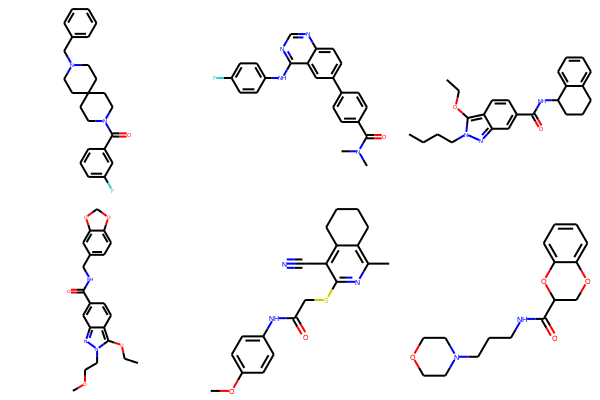

In [19]:
Draw.MolsToGridImage(chembl_mols[:6])

Let's make somewhat better use of space:

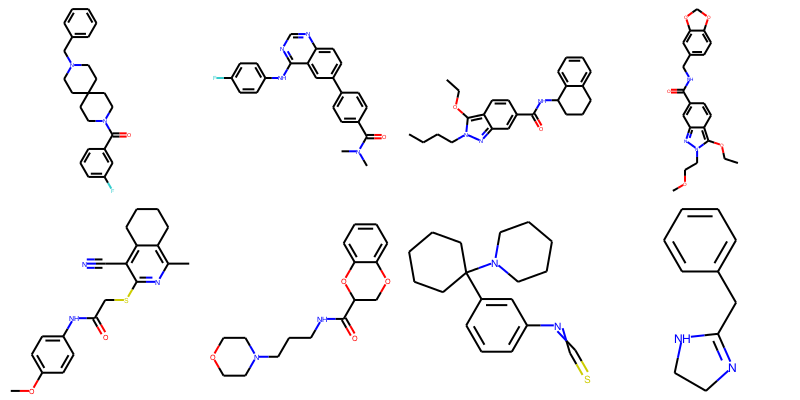

In [20]:
Draw.MolsToGridImage(chembl_mols[:8],molsPerRow=4)

And add legends to the image:

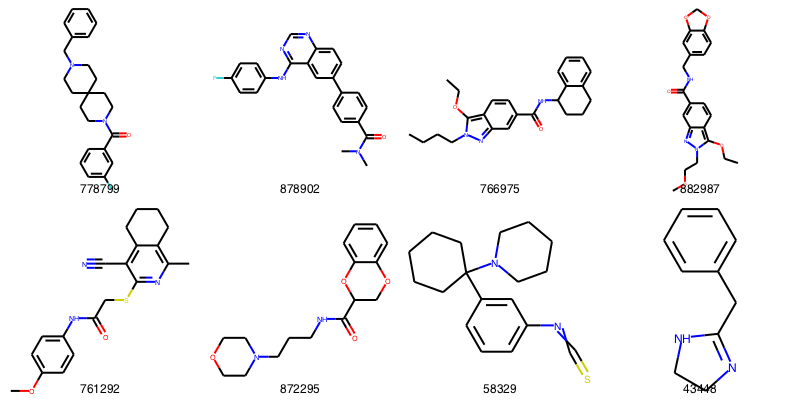

In [21]:
Draw.MolsToGridImage(chembl_mols[:8],molsPerRow=4,legends=[x.GetProp('molregno') for x in chembl_mols])

## Substructure searching

In [22]:
q = Chem.MolFromSmarts('n1nc2ccccc2c1')
print(chembl_mols[2].HasSubstructMatch(q))

True


In [23]:
print(chembl_mols[2].GetSubstructMatch(q))

(4, 5, 6, 7, 8, 9, 10, 11, 12)


Another feature of the jupyter integration is that the substructure matches will be automatically highlighted:

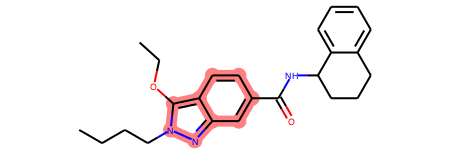

In [24]:
chembl_mols[2]

## Generating SMILES

Let's collect all the SMILES from the set of ChEMBL molecules that matched the substructure query we were using before.

In [25]:
matching_smiles = [Chem.MolToSmiles(x,isomericSmiles=True) \
                     for x in chembl_mols if x.HasSubstructMatch(q)]
len(matching_smiles)

8

That `isomericSmiles` argument is important; otherwise information about isomers and stereochemistry do not end up in the SMILES:

In [26]:
Chem.MolToSmiles(Chem.MolFromSmiles('C[C@H](F)Cl'))

'CC(F)Cl'

The SMILES generated is canonical by default:

In [27]:
ms = [Chem.MolFromSmiles('Cc1ncccc1'),Chem.MolFromSmiles('c1ccnc(C)c1')]
print([Chem.MolToSmiles(x,isomericSmiles=True) for x in ms])

['Cc1ccccn1', 'Cc1ccccn1']


But we can turn that off if we really want to:

In [28]:
print([Chem.MolToSmiles(x,isomericSmiles=True,canonical=False) for x in ms])

['Cc1ncccc1', 'c1ccnc(C)c1']


## Generating 2D structures

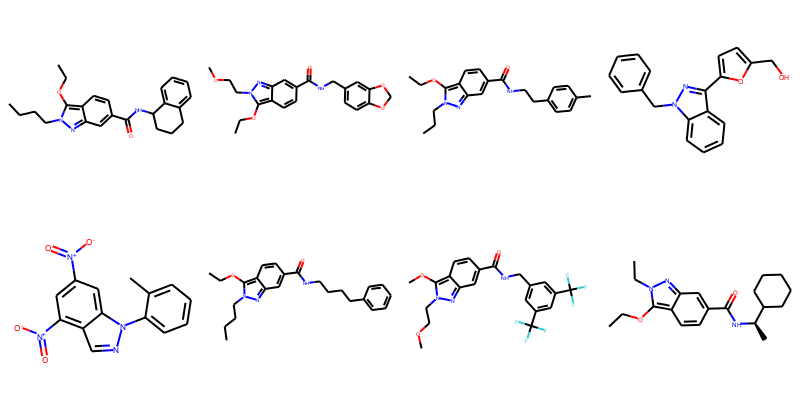

In [29]:
mols = [Chem.MolFromSmiles(x) for x in matching_smiles]
[AllChem.Compute2DCoords(x) for x in mols]
Draw.MolsToGridImage(mols,molsPerRow=4)

It would be much nicer if that common core were aligned the same way in every depiction:

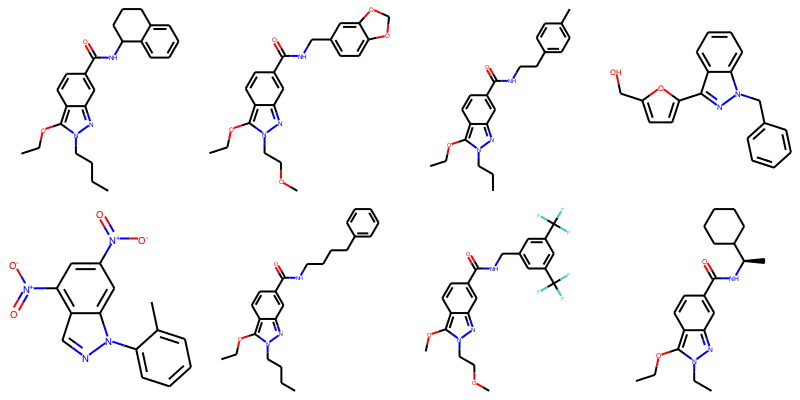

In [30]:
AllChem.Compute2DCoords(q)
[AllChem.GenerateDepictionMatching2DStructure(x,q) for x in mols]
Draw.MolsToGridImage(mols,molsPerRow=4)

## KNIME Aside:

<img src="images/KNIME_coords_and_smiles.png" width="400"> <img src="images/KNIME_coords_and_smiles_out.png" width="500"> 


## Generating 3D structures

Preamble: some code for using 3DMol.js in jupyter:

In [31]:
# some code for dealing with 3d molecules in jupyter:
import py3Dmol
def drawit(m,p=None,confId=-1):
        mb = Chem.MolToMolBlock(m,confId=confId)
        if p is None:
            p = py3Dmol.view(width=400,height=400)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

Here's the molecule we'll be working with:

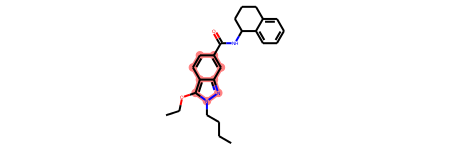

In [32]:
m = mols[0]
m

We want to add hydrogens to the molecule before generating a conformer:

In [33]:
m = Chem.AddHs(m)

Generate a 3D conformer:

In [34]:
# generate a 3D structure using the new algorithm:
AllChem.EmbedMolecule(m,randomSeed=0xf00d,useExpTorsionAnglePrefs=True,useBasicKnowledge=True)
drawit(m)

Generate multiple 3D conformers:

In [35]:
cids = AllChem.EmbedMultipleConfs(m,10,pruneRmsThresh=1.0,randomSeed=0xf00d,
                           useExpTorsionAnglePrefs=True,useBasicKnowledge=True)
list(cids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

What just happened?

A molecule can have multiple conformers attached:

In [36]:
m.GetNumConformers()

10

Quick aside on conformers

In [37]:
conf = m.GetConformer(cids[0])
conf

In [38]:
conf.Is3D()

True

In [39]:
conf.GetNumAtoms()

58

In [40]:
conf.GetAtomPosition(0)

In [41]:
ps = conf.GetPositions() # returns a numpy array with all atomic positions
ps[:3]

array([[ 6.34081444,  3.93202136,  0.26143963],
       [ 5.82636155,  2.88117118,  1.22242233],
       [ 4.67750714,  2.1008175 ,  0.57781363]])

### Super cool interactive conformer browser
(unfortunately doesn't work in a slideshow)

In [42]:
from ipywidgets import interact, interactive, fixed
# align to one of the ring systems:
AllChem.AlignMolConformers(m,m.GetSubstructMatch(q))

# now construct the view and interactive widget:
p = py3Dmol.view(width=400,height=400)
interact(drawit, m=fixed(m),p=fixed(p),confId=(0,m.GetNumConformers()-1));  # Tip: the semicolon does something here

## KNIME Aside

Generating a single conformer:
<img src="images/KNIME_generate_3d_coords.png" width="200"> <img src="images/KNIME_generate_3d_coords_out.png" width="350"> 

Generating multiple conformers:
<img src="images/KNIME_generate_confs.png" width="250"> <img src="images/KNIME_generate_confs_out.png" width="350"> 

## Pandas integration

In [43]:
import pandas as pd
from rdkit.Chem import PandasTools
PandasTools.molRepresentation='svg'
df = PandasTools.LoadSDF('./data/chembl_cyps.head.sdf')
df.head(3)

AC50      ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

We can do substructure searches across the table:

In [44]:
filt_df = df[df.ROMol>=q]
filt_df.shape

(8, 15)

In [45]:
# reduce the number of columns so that we can see the molecules:
filt_df2 = pd.concat([filt_df.molregno,filt_df.ROMol,filt_df.pAC50],axis=1, keys=['molregno', 'ROMol', 'pAC50'])
filt_df2.head(3)

molregno                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

And there are grid images here too:

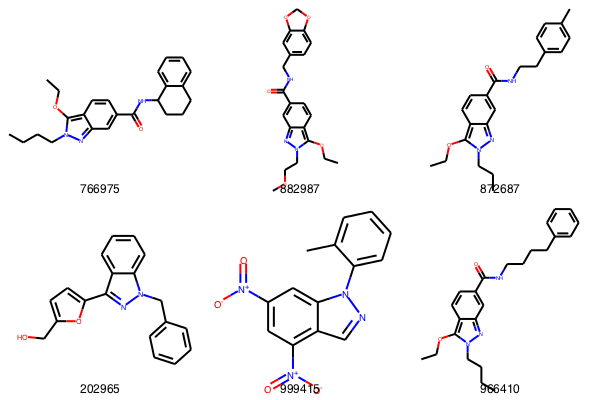

In [46]:
PandasTools.FrameToGridImage(filt_df2.head(6),legendsCol='molregno')

# Descriptors

Here's the molecule we'll be working with

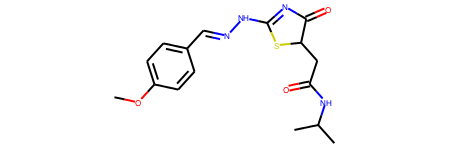

In [47]:
m = Chem.MolFromSmiles(r'COc1ccc(C=NNC2=NC(=O)C(CC(=O)NC(C)C)S2)cc1')
m

Import the Descriptors module and calculate a few basic ones:

In [48]:
from rdkit.Chem import Descriptors

Descriptors.MolLogP(m),Descriptors.TPSA(m),Descriptors.NumRotatableBonds(m)

(1.5313999999999997, 92.15, 6)

Adding descriptors to a pandas table:

In [49]:
fdf = pd.concat([df.molregno,df.ROMol,df.pAC50],axis=1, keys=['molregno', 'ROMol', 'pAC50'])
fdf['MolLogP'] = fdf.ROMol.map(Descriptors.MolLogP)
fdf['AMW'] = fdf.ROMol.map(Descriptors.MolWt)
fdf['NumRotatableBonds'] = fdf.ROMol.map(Descriptors.NumRotatableBonds)
fdf.describe()

,MolLogP,AMW,NumRotatableBonds
count,1000.000000,1000.000000,1000.000000
mean,3.395704,351.439306,4.721000
std,1.456381,90.810799,2.471288
min,-2.242780,94.117000,0.000000
25%,2.479370,292.388500,3.000000
50%,3.431350,343.423500,4.000000
75%,4.372420,398.444750,6.000000
max,9.066100,800.990000,16.000000


In [50]:
fdf.head(3)

molregno                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [51]:
frags = fdf[(fdf.AMW<=300) & (fdf.MolLogP<=3) & (fdf.NumRotatableBonds<=3)] # do not forget the parens here!
frags.describe()

,MolLogP,AMW,NumRotatableBonds
count,113.000000,113.000000,113.000000
mean,1.779306,236.496301,1.991150
std,0.813217,44.786407,0.940133
min,-0.866300,94.117000,0.000000
25%,1.267000,207.237000,1.000000
50%,1.934140,234.255000,2.000000
75%,2.353980,275.352000,3.000000
max,2.982700,299.309000,3.000000


In [52]:
frags.head(3)

molregno                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## KNIME Aside:

<img src="images/KNIME_descriptors.png" width="400"> <img src="images/KNIME_descriptors_out.png" width="500"> 
